# Model Selection

# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
titanic_data=pd.read_csv(r"C:\Users\hp\Downloads\titanic_dataset.csv")

In [3]:
#top 5 rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Last 5 rows of the dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Total no.of rows and columns in the dataset
titanic_data.shape

(891, 12)

In [6]:
#column names of dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#basic stats information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Description of the measures
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#checking for duplicates
titanic_data.duplicated().sum()   

0

# Exploratory data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

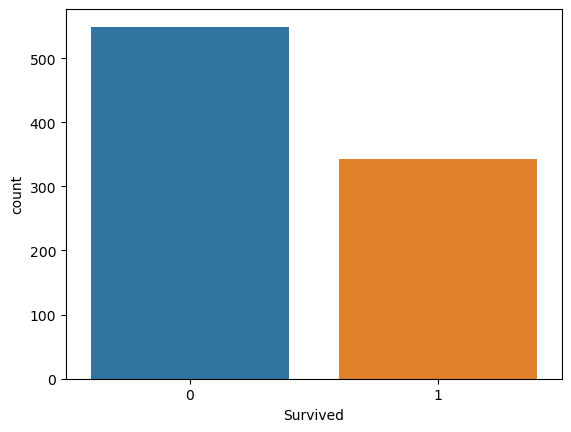

In [10]:
sns.countplot(titanic_data['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

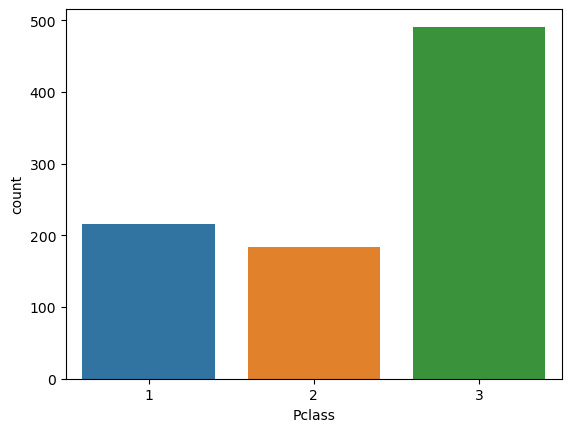

In [11]:
sns.countplot(titanic_data['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

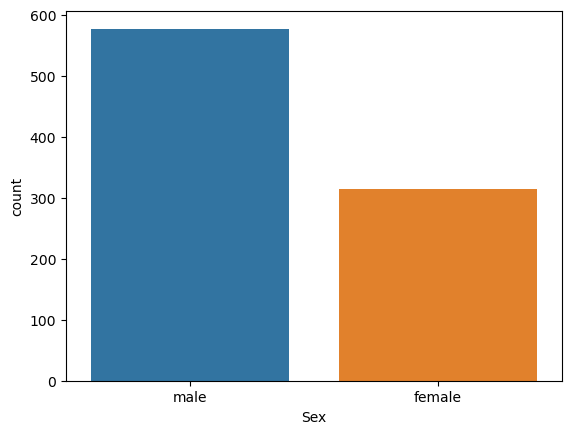

In [12]:
sns.countplot(titanic_data['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

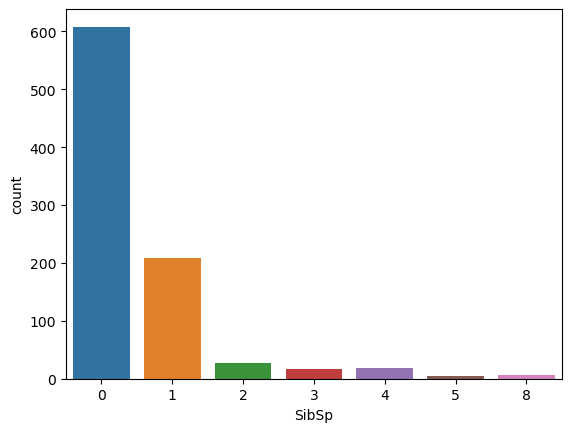

In [13]:
sns.countplot(titanic_data['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

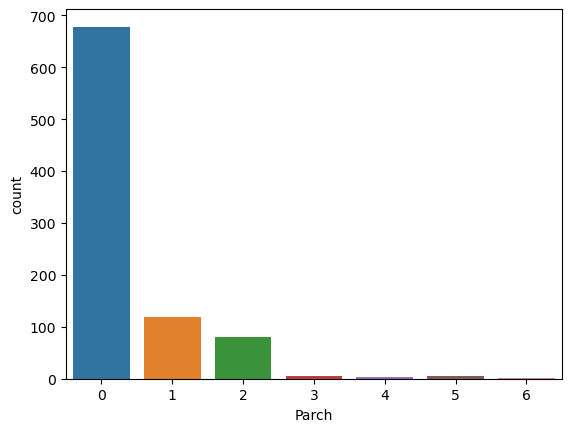

In [14]:
sns.countplot(titanic_data['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

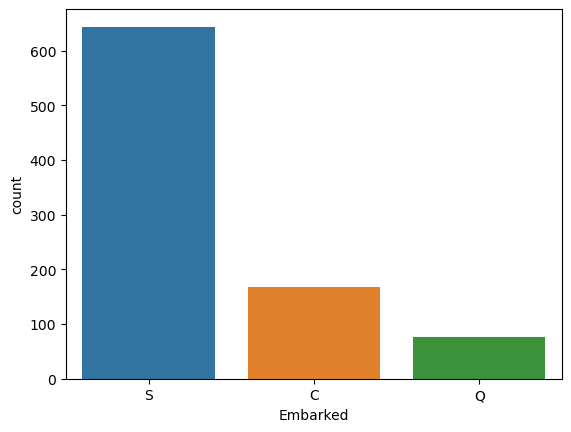

In [15]:
sns.countplot(titanic_data['Embarked'])

In [16]:
#numerical attributes

<AxesSubplot:xlabel='Age', ylabel='Density'>

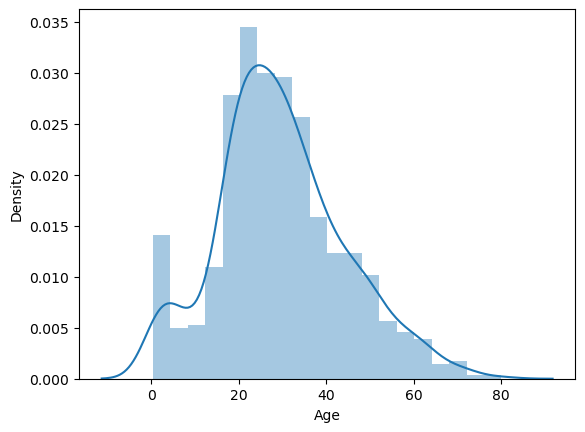

In [17]:
sns.distplot(titanic_data['Age'])

**almost normal distribution**

<AxesSubplot:xlabel='Fare', ylabel='Density'>

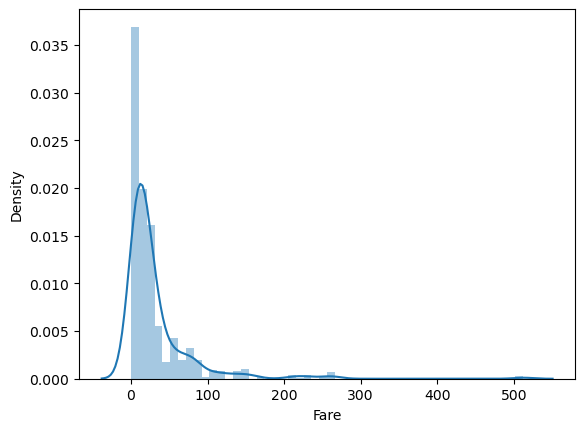

In [18]:
sns.distplot(titanic_data['Fare'])

In [19]:
passengers=titanic_data.groupby(['Sex','Survived']).count()
passengers['PassengerId']

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

# Data preprocessing

In [20]:
#find the null values

In [21]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are some null values present in age,cabin and embarked columns.The no.of nullvalues for the cabin cloumn is something big value.So we can drop the column because it doesn't give any reasonable contribution to the analysis.

In [22]:
#drop or delete the column 'Cabin'

In [23]:
df=titanic_data.drop('Cabin',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
#filling missing values using mean of that column for numerical columns
df['Age']=df['Age'].fillna(df['Age'].mean())

In [25]:
#filling missing values using mode of that column for categorical column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
#The plot for 'fare' was not normally distributed.So lets do log transformation for uniform data distribution.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

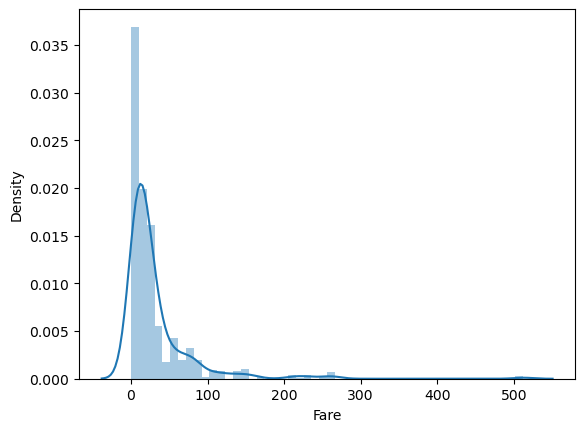

In [28]:
sns.distplot(df['Fare'])

In [29]:
df['Fare']=np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

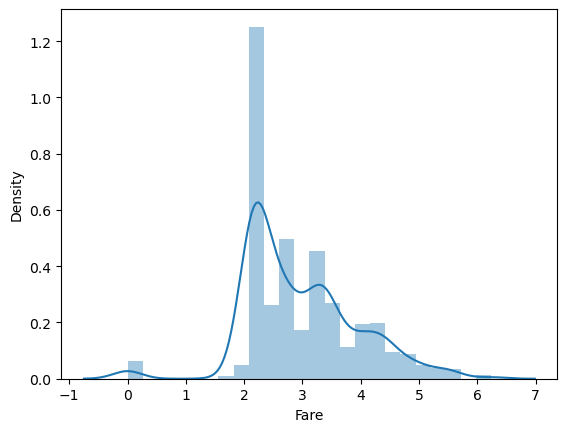

In [30]:
sns.distplot(df['Fare'])

# Correlation Matrix

<AxesSubplot:>

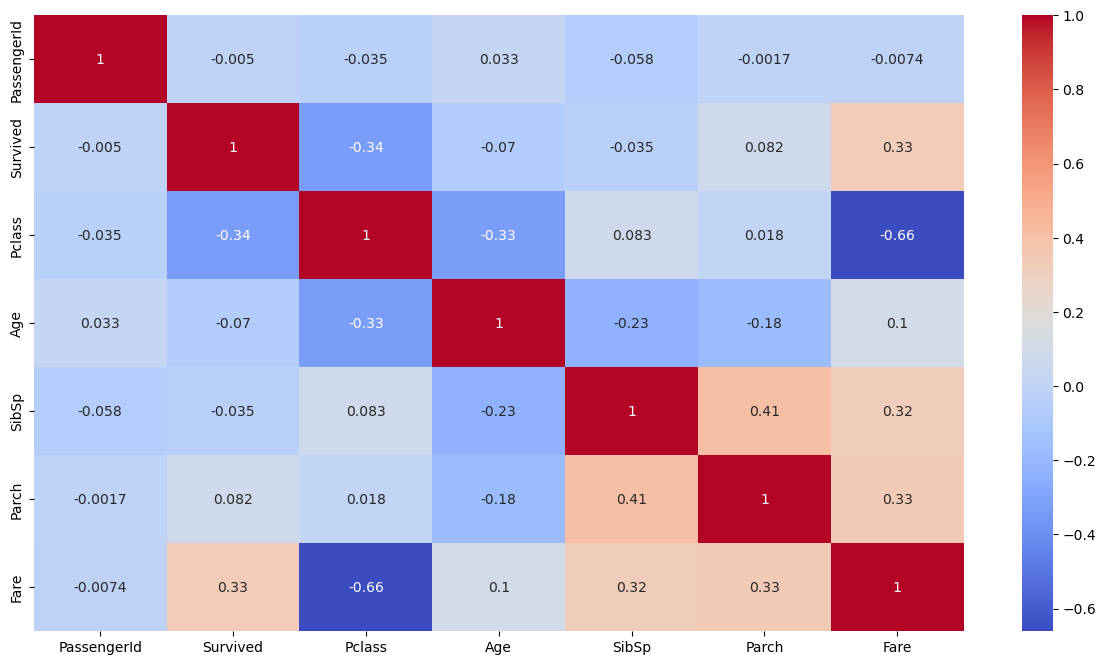

In [31]:
corrmatrix=df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm')

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


The columns named Name,Ticket no doesn't give any information to the prediction so we will drop these columns from the data.

In [33]:
#let's drop unnecessary columns
df=df.drop(['Name','Ticket'],axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
df['Sex']=df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=df['Embarked']=le.fit_transform(df['Embarked'])

In [37]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


# Train-Test-Split

In [38]:
X=df.drop(['PassengerId','Survived'],axis=1)
y=df['Survived']

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Knn Model

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,10)


for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [43]:
metric_k

[0.7932960893854749,
 0.7374301675977654,
 0.7932960893854749,
 0.7653631284916201,
 0.7653631284916201,
 0.7486033519553073,
 0.7597765363128491]

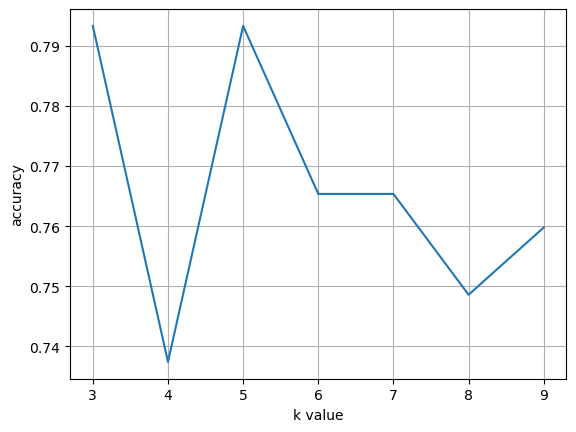

In [44]:
plt.plot(neighbors,metric_k)
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

the accuracy is highest at 3 and 5 k value.

# Hyperparameter Tuning

In [45]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (3,5),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}         

In [46]:
from sklearn.model_selection import GridSearchCV
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [47]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.7597765363128491


**K-fold cross validation**

In [48]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv_score=cross_val_score(model,X,y,cv=kfold_validator)

In [51]:
cv_score

array([0.7       , 0.78651685, 0.78651685, 0.75280899, 0.7752809 ,
       0.75280899, 0.75280899, 0.78651685, 0.86516854, 0.7752809 ])

In [52]:
np.mean(cv_score)

0.773370786516854

In [53]:
print('average_score :',np.mean(cv_score))

average_score : 0.773370786516854


**Stratified k-fold cross validation**

In [54]:
from sklearn.model_selection import StratifiedKFold

In [55]:
skfold_validator= StratifiedKFold(n_splits=10)

In [56]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [57]:
skcv_score=cross_val_score(model,X,y,cv=skfold_validator)
skcv_score

array([0.72222222, 0.74157303, 0.76404494, 0.80898876, 0.79775281,
       0.75280899, 0.78651685, 0.78651685, 0.82022472, 0.75280899])

In [58]:
print("average score of knn: ",np.mean(skcv_score))

average score of knn:  0.7733458177278403


# SVM Model

In [61]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [62]:
y_pred_svm=svmclf.predict(x_test)

In [63]:
y_pred_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
print('Accuracy=',accuracy_score(y_test,y_pred_svm))

Accuracy= 0.7821229050279329


**K fold cross validation**

In [65]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [66]:
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [67]:
from sklearn.model_selection import cross_val_score

In [69]:
cv_score=cross_val_score(svmclf.fit(x_train,y_train),X,y,cv=kfold_validator)

In [70]:
cv_score

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [71]:
np.mean(cv_score)

0.786729088639201

**Stratified cross validation**

In [72]:
skfold_validator= StratifiedKFold(n_splits=10)

In [73]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [ ]:
svm_skcv_score=cross_val_score(svmclf.fit(x_train,y_train),X,y,cv=skfold_validator)
svm_skcv_score

In [ ]:
print("average score of knn: ",np.mean(svm_skcv_score))